In [2]:
#LOAD LIBRARIES AND READ DATA
from functions import *
Data=read_data()
lcolor='#EEC584'

# EFFECT OF CHLORIDE ON OXA48'S REACTION RATES

OXA48 is a beta-lactamase that shows biphasic kinetics in the presence of chloride, like these:

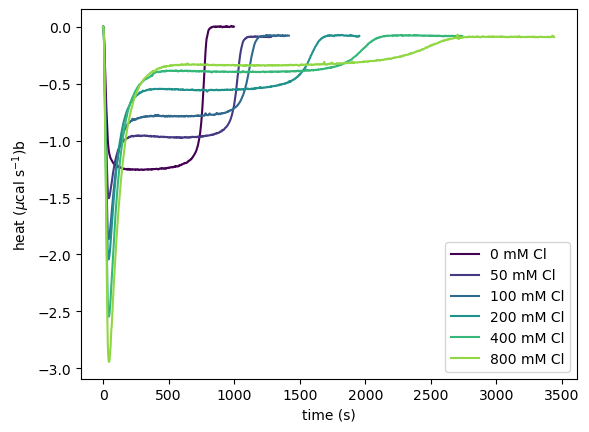

In [3]:
DataCl=Data['Cl']
fig=plt.figure()
ax=plt.gca()
cmap=matplotlib.colormaps['viridis']
CL=[0,50,100,200,400,800]
for i,Cl in enumerate(CL):
    D=DataCl[Cl].dropna()
    ax.plot(D,color=cmap(i/len(CL)), label=str(Cl)+' mM Cl')
ax.set_xlabel('time (s)');
ax.set_ylabel('heat ($\mu$cal s$^{-1}$)b');
ax.legend();
fig.savefig('figures/suppfig_dataCl.pdf', bbox_inches='tight')

In our main text, we have shown that chloride binds OXA48’s dimer interface, which implies the reversible reaction $E+2\text{Cl}^- \rightleftharpoons E^{\text{Cl}}$ where $E^{\text{Cl}}$ is the enzyme with two chloride molecules in the interface. Since the concentration of chloride is much larger than that of enzyme in our experiments, it is not unreasonable to suppose that most of the enzyme is in $E^{\text{Cl}}$ form, and we will consider only this form in the following.

This form of the enzyme undergoes the usual reactions, $E^{\text{Cl}}+S \xrightarrow{k'_1} E^{\text{Cl}}A \xrightarrow{k'_2} E^{\text{Cl}}+P+H,$ where $k'_1$, and $k_2'$ could in principle depend on chloride.

In addition, $E^{Cl}A$ undergoes two extra reactions to and from an inactive intermediate complex $E^{\text{Cl}}A.\text{Cl}$:
 
 $E^{\text{Cl}}A + \text{Cl}^- \underset{k'_{-3}}{\stackrel{k'_3}{\rightleftharpoons}} E^{\text{Cl}}A.\text{Cl}$ 
 
Deriving the corresponding ordinary differential equations from the law of mass action (which is warranted since the number of molecules in our experiments is very high), we obtain the following system:

$\displaystyle\frac{d[E^{\text{Cl}}]}{dt} = -k'_1[E^{\text{Cl}}][S]+k'_2[E^{\text{Cl}}A],$

$\displaystyle\frac{d[S]}{dt} = -k'_1[E^{\text{Cl}}][S],$

$\displaystyle\frac{d[E^{\text{Cl}}A]}{dt} = k'_1[E^{\text{Cl}}][S]-k'_2[E^{\text{Cl}}A]-k'_3[E^{\text{Cl}}A][\text{Cl}^-]+k'_{-3}[E^{\text{Cl}}A.\text{Cl}]$

$\displaystyle\frac{d[E^{\text{Cl}}A.\text{Cl}]}{dt} = k'_3[E^{\text{Cl}}A][\text{Cl}^-]-k'_{-3}[E^{\text{Cl}}A.\text{Cl}],$

$\displaystyle\frac{dH}{dt} = -ck'_2 [E^{Cl}A].$

Here $[X]$ is the concentration of molecule $X$, where $X=E, S, E^{\text{Cl}}A$ or $E^{\text{Cl}}A.\text{Cl}$, and $c$ is the conversion constant between moles of product and calories of heat. The variable that is measured experimentally in the ITC experiments is a function of $dH/dt$, the instantaneous heat release (see next section).

For simplicity of notation, we will drop the bracket notation, using $E$ to refer to both forms of the enzyme, $C$ to refer to the active intermediate and $C_2$ to refer to the inactive intermediate. The model then becomes

$\displaystyle\frac{dE}{dt}=-k'_1ES+k'_2C,$

$\displaystyle\frac{dS}{dt}=-k'_1ES,$

$\displaystyle\frac{dC}{dt}=k'_1ES-k'_2C-k'_3\text{Cl}^{-}C+k'_{-3}C_2,$

$\displaystyle\frac{dC_2}{dt}=k'_3\text{Cl}^-C-k'_{-3}C_2,$

$\displaystyle\frac{dH}{dt}=-ck'_2C,$

where $k'_1, k'_2, k'_3$ and $k'_{-3}$ are apparent reaction rates that will be taken as functions of chloride. In what follows we will use mathematical arguments to discuss the effect chloride has on them.

We have also performed 50 independent numerical fits of these four parameters to each chloride treatment (300 parameter sets in total), using [a custom simulated annealing optimization algorithm](https://www.science.org/doi/full/10.1126/sciadv.abp8412). Simulated annealing is a Monte Carlo method that tries to find the
best fit to a dataset starting from an initial guess and iteratively choosing one parameter to change at
random. If changing a parameter improves the fit, the new parameter set is accepted. If it doesn’t
improve the fit, the algorithm accepts the new set with a probability lower than one: this is done so
that the algorithm is not stuck at suboptimal parameter sets and allows it to find better fits. The
particularity of simulated annealing when compared with other Monte Carlo approaches is that here
the probability of accepting a new parameter set decreases as the number of iterations increases,
mimicking a decrease in the “temperature” of the system16. Note that simulated annealing tries to fit
all parameters at the same time, thus obtaining a coherent parameter set that is consistent with the
data. The resulting curves are shown below.

## ITC versus UV-VIS data (Fig. S7f)

The variable that is measured experimentally in the ITC experiments is a function of $dH/dt$, the instantaneous heat release when the reaction occurs. This is different from UV-VIS data, that measures the absorbance of light from the substrate and, therefore, measures how much substrate is left in the sample.

Both measurements are equivalent, if we adequately transform them: integrating the ITC curve and dividing by $c$ we obtain the amount of product at time $t$, $P(t)$. Similarly, dividing the UV-Vis curve by its value at $t=0$, then multiplying by $S_0=S(0)$, we obtain the amount of substrate at time $t$, $S(t)$. Because each molecule of product comes from one molecule of product, it has to happen that $P(t)=S_0-S(t)$, which is what we observe:

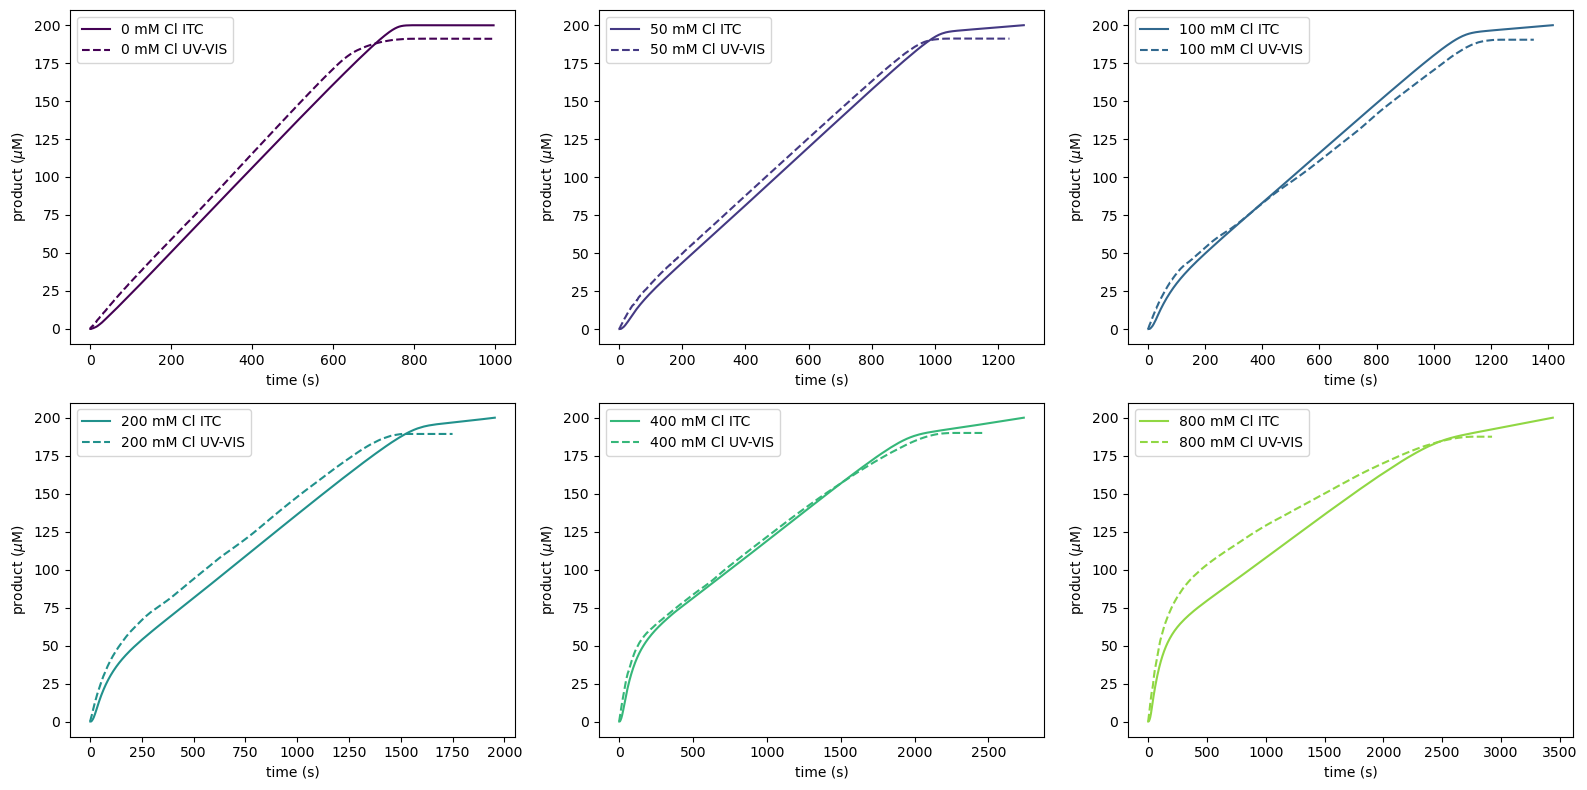

In [4]:
DataCl=Data['Cl']
Data2=pd.read_excel('data/UV-Vis.xlsx')
fig=plt.figure(figsize=(16,8))
cmap=matplotlib.colormaps['viridis']
CL=[0,50,100,200,400,800]
S0=200
for i,Cl in enumerate(CL):
    ax=fig.add_subplot(2,3,i+1)
    #ITC curve
    D=DataCl[Cl].dropna()
    rD=realH(D)
    CD=np.cumsum(rD)
    c=getc(D,S0)
    T=range(len(CD))
    ITC=-CD/c
    #UV-VIS curve
    D2=Data2[Cl].dropna()
    T2=Data2['Time'][0:len(D2)]
    UV=S0-D2/D2[0]*S0
    ax.plot(T,ITC,color=cmap(i/len(CL)), label=str(Cl)+' mM Cl ITC')
    ax.plot(T2,UV, '--', color=cmap(i/len(CL)), label=str(Cl)+' mM Cl UV-VIS')
    ax.set_xlabel('time (s)');
    ax.set_ylabel('product ($\mu$M)');
    ax.legend();
fig.tight_layout()
fig.savefig('figures/suppfig_ITC_vs_UV-VIS.pdf', bbox_inches='tight')

## Working with the “real” heat curve (Fig. S16)

The shape of ITC titration curves is affected by the calorimeter response time, as mentioned in [the 2012 kinITC paper by Burnouf et al.](https://pubs.acs.org/doi/10.1021/ja209057d). The signal measured by the calorimeter decreases exponentially with a characteristic time $t_{ITC}$, and so the measured heat release $P_m(t)$ is actually a convolution between the real signal $P_s(t)=dH/dt$ and an exponential kernel $R(t)=(t_{ITC})^{-1} \exp(-t/t_{ITC})$. Thus,
$$P_m(t)=\frac{1}{t_{ITC}} \int_0^t \exp(-(t-\tau)/t_{ITC}) P_s(\tau) \, d\tau,$$
which can be solved either differentiating once or using the Laplace transform, yielding
$$t_{ITC}\frac{dP_m}{dt}+P_m=P_s(t).$$

Given a measured signal $P_m(s)$, we can numerically obtain from this equation the “real” signal that corresponds to our dynamic equations. In our experiments, $t_{ITC}=8\, s$ (see Methods). The result is plotted in the following figure:

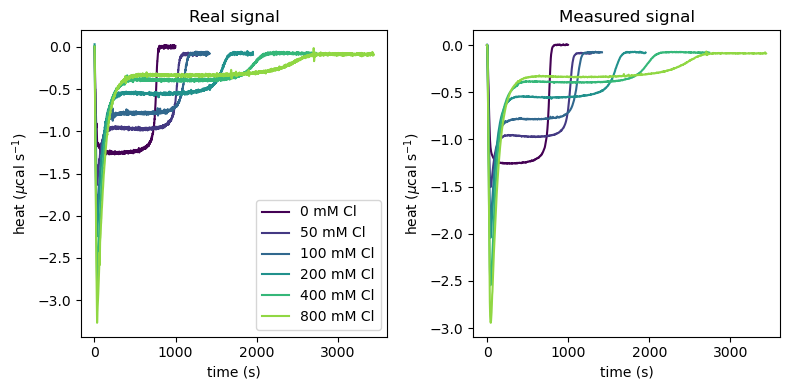

In [5]:
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
cmap=matplotlib.colormaps['viridis']
CL=[0,50,100,200,400,800]
for i,Cl in enumerate(CL):
    D=DataCl[Cl].dropna()
    ax1.plot(realH(D),color=cmap(i/len(CL)), label=str(Cl)+' mM Cl')
    ax2.plot(D,'-',color=cmap(i/len(CL)), label=str(Cl)+' mM Cl')
ax1.set_xlabel('time (s)');
ax1.set_ylabel('heat ($\mu$cal s$^{-1}$)');
ax2.set_xlabel('time (s)');
ax2.set_ylabel('heat ($\mu$cal s$^{-1}$)');
ax1.set_title('Real signal')
ax2.set_title('Measured signal')
ax1.legend();
fig.tight_layout()
fig.savefig('figures/suppfig_real_vs_measured_signal.pdf', bbox_inches='tight')

The two signals seem very similar, but there are relevant differences especially when there are spikes of heat release, such as at the beginning of the titration experiment:

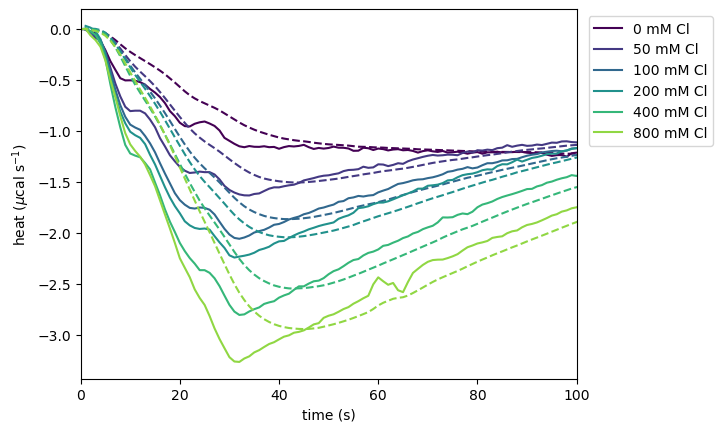

In [6]:
fig=plt.figure()
ax=plt.gca()
for i,Cl in enumerate(CL):
    D=DataCl[Cl].dropna()
    ax.plot(realH(D),color=cmap(i/len(CL)), label=str(Cl)+' mM Cl')
    ax.plot(D,'--',color=cmap(i/len(CL)))
ax.set_xlabel('time (s)');
ax.set_ylabel('heat ($\mu$cal s$^{-1}$)');
ax.legend(bbox_to_anchor=[1.01,1], loc='upper left');
ax.set_xlim([0,100])
fig.savefig('figures/suppfig_real_vs_measured_signal_init.pdf', bbox_inches='tight')

In what follows, we will use the “real” signal $P_s(t)$ to obtain kinetic rates and then use these to simulate our model. In order to compare with the experimental datasets, we will then transform our mathematical variable $dH/dt$ to a measured $P_m$ using the differential equation above.

## Baseline correction

As seen in Fig. 2, the ITC data shows a baseline drift, but we will not correct it, as it will not significantly alter our main conclusions.

## Dealing with finite time injection of the substrate

A common problem when modelling ITC curves comes from the fact that the injection of the substrate
into the sample cell is not instantaneous, but rather requires a finite amount of time. Typically, this
injection is also combined with fast mixing, so that a homogeneous concentration of substrate is
quickly attained in the sample cell. Writing this out mathematically is a challenge: ideally, we could
derive a partial differential equation that would incorporate the diffusion into the sample cell but
deriving a mathematical expression for the mixing term seems rather hard.

Since our main purpose is to extract OXA48’s reaction rates, we have found a simple, alternative way to model the diffusion of the substrate throughout the ITC chamber by modeling a linear injection of enzyme into the system. The equation for $E$ then becomes
$$\frac{dE}{dt}=\frac{E_T}{k_0}(1-\Theta(t-k_0))-k'_1ES+k'_2C,$$
where $\Theta(t)$ is the Heaviside function that takes value 0 if $t<0$ and 1 if $t>0$. $k_0$ is the time needed for the substrate to diffuse, and we will set it to values between 20 and 30 seconds depending on the experiment. For instance, using $k_0=30\,s$ for the experiment with different chloride concentrations, we get this figure, which does a good job of capturing this initial injection and mixing.

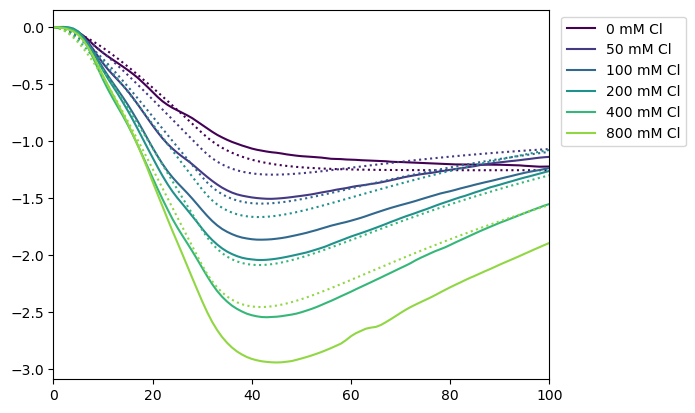

In [21]:
k0=30
k1=1
k3=0.01
E0=100e-3
S0=200
CL=[0,50,100,200,400,800]
fig=plt.figure()
ax=plt.gca()
cmap=matplotlib.colormaps['viridis']
for i,Cl in enumerate(CL):
    D=DataCl[Cl].dropna()
    Dr=realH(D)
    c=getc(D,S0)
    k2=getk2(Dr,c,E0)
    k3,k4=getk3k4(Dr,Cl,E0,S0, 750)
    Params=Parameters(k0,k1,k2,k3,k4,E0)
    tf=len(D)
    y0=[0,S0,0,0]
    sol=solve_ivp(oxa,(0,tf),y0,method='Radau',t_eval=range(tf),args=((Params,)))
    T=sol.t
    C=sol.y[2,:]
    H=heat(c,k2,C)
    Hs=measuredH(T,H)
    ax.plot(D,'-',color=cmap(i/len(CL)),label=str(CL[i])+' mM Cl')
    ax.plot(T,Hs,ls='dotted',color=cmap(i/len(CL)))
ax.legend(bbox_to_anchor=[1.01,1], loc='upper left')
ax.set_xlim([0,100])
fig.savefig('figures/suppfig_k0.pdf', bbox_inches='tight')

Now we turn to finding out the parameters in our model.

## Finding out $c$ (Fig. S17)

Integrating the area under any of our experimental ITC curves, we obtain the total heat released when all the substrate has been hydrolyzed. We would get the same value by multiplying the initial substrate concentration ($S_0=200 \, \mu M$) times $c$, the conversion rate. So we can estimate $c$ by dividing the total heat released by $S_0$. Using this method in our ITC experiments with different chloride concentrations, we get values of $c$ between 4.5 and 5.5 calories per mole, increasing linearly with chloride concentration. As there is no binding heat from chloride, the variability would then come from an intrinsic drift of the baseline inherent from the ITC method.

As there is no binding heat from chloride, the variability could then come from an intrinsic drift of the
baseline inherent from ITC as a technique. This drift worsens with the length of the experiment: if the
increase in $c$ values was due to the baseline drift, we would expect $c$ to increase with the length of
the ITC curve (measured in seconds), and this is what we observe (Fig. S17b). Therefore, we will
use the estimated value of for each chloride concentration in the following sections. We also allow
our simulated annealing algorithm to fit the values of $c$, to account for errors induced by the drift in
the ITC baseline, finding values similar to our estimates.

In [ ]:
cV=[]
L=[]
CL=[0,50,100,200,400,800]
for i,Cl in enumerate(CL):
    D=DataCl[Cl].dropna()
    mask=D<-0.095
    c2=-auc(D[mask])/200
    c=-auc(D)/200
    cV.append(c)
    L.append(len(D))
    print('Cl='+str(Cl),'mM, c=',round(c,3),' cal/M')
    #fig=plt.figure()
    #ax=plt.gca()
    #ax.plot(D[mask])

fig=plt.figure(figsize=(8,4))
ax=fig.add_subplot(1,2,1)
ax.text(0,1.05,'a', fontsize=15, transform=ax.transAxes)
ax.plot(CL,cV,'o', markerfacecolor='lightblue', markeredgecolor='k')
ax.set_xlabel('Cl (mM)')
ax.set_ylabel('c (cal M$^{-1}$)');
#FIT
from scipy.optimize import curve_fit
def line(x,a,b):
    return a+b*x
popt, pcov = curve_fit(line,CL,cV)
R2=getR2(cV,line(np.array(CL),*popt))
print('In part a), we look for a linear relationship between c and chloride:')
print('The fitted equation is '+str(round(popt[0],2))+'+'+str(round(popt[1],4))+'*Cl')
print('R^2 is '+str(round(R2,5)))
clp=np.linspace(0,800,100)
yp=line(clp,*popt)
ax.plot(clp,yp,'--', color=lcolor);


ax=fig.add_subplot(1,2,2)
ax.text(0,1.05,'b', fontsize=15, transform=ax.transAxes)
ax.plot(L,cV,'o', markerfacecolor='lightblue', markeredgecolor='k')
ax.set_xlabel('Length of ITC curve (s)')
ax.set_ylabel('c (cal M$^{-1}$)');
#FIT
from scipy.optimize import curve_fit
def line(x,a,b):
    return a+b*x
popt, pcov = curve_fit(line,L,cV)
R2=getR2(cV,line(np.array(L),*popt))
print('In part b), we look for a linear relationship between c and length of ITC curve:')
print('The fitted equation is '+str(round(popt[0],2))+'+'+str(round(popt[1],4))+'*Cl')
print('R^2 is '+str(round(R2,5)))
clp=np.linspace(L[0],L[-1],100)
yp=line(clp,*popt)
ax.plot(clp,yp,'--', color=lcolor);
fig.tight_layout()
fig.savefig('figures/suppfig_c_vs_chloride.pdf', bbox_inches='tight')
fig.savefig('figures/suppfig_c_vs_chloride.png', bbox_inches='tight')


#WRITE DATA
DF=pd.DataFrame({'Cl (mM)': CL, 'c (cal/M)': cV, 'Time (s)': L})
DF.to_excel('results/c_vs_chloride.xlsx', engine='openpyxl', index=False)

## The relationship between $k_2'$ and chloride

In the absence of chloride, OXA48 follows typical Michaelis-Menten dynamics, as seen before. First, there is a quick increase in heat release, followed by a second stage where heat release is constant (and maximum). If heat release is constant, then as $dH/dt=-ck'_2C$ and both $c$ and $k'_2$ are constants, $C$ must also be a constant. Therefore, $dC/dt=0$, which implies that $k'_1ES=k'_2C$. But $E+C=E_T$ is the total enzyme concentration, so solving for $E$ and substituting in the above equation we get
$$k'_1E_TS-k'_1CS=k'_2C \implies C=\frac{k'_1E_TS}{k'_1S+k'_2}=\frac{E_T}{1+\frac{k'_2}{k'_1S}}.$$
Now, $S \gg E_t$ at this point in the experiment, as initial substrate concentration is $200 \mu M$, while $E_T=100\, nM$, three orders of magnitude less. If we assume $k'_1$ and $k'_2$ are in the same order of magnitude (an assumption that will be checked later) we deduce from this that, in the constant release stage, almost all the enzyme is in $C$ form.

At this point of maximum heat release, we have 
$$k'_2=-\frac{dH/dt}{c C} \approx -\frac{dH/dt}{c E_T}$$ 
and as we know both $c=4.5 cal M^{-1}$  and $E_T=100 nM$ we can derive $k'_2$ from measuring the value of $dH/dt$ at the constant heat release stage. For the treatment with no chloride, we get $k_2=2.83 s^{-1}$.

When repeating the experiment with nonzero concentrations of chloride in solution, we find that the maximum heat release increases as chloride increases. As both $c$ and $E_T$ are the same throughout all experimental conditions, it must be the case that $k'_2$ is increasing with chloride. We now set to infer the relationship between $k'_2$ and chloride concentration.

The maximum heat release in all cases is reached at $t\approx 34\, s$ and by that time the 0 mM chloride treatment has almost reached the maximum heat release. If we assume that $k'_1$ is not greatly affected by chloride (we will check this assumption later), we deduce that by $t=34\, s$ almost all of the enzyme is in $C$ form in all treatments. That is 
$$(dH/dt)_{max}=ck'_2 E_T \implies k'_2=\frac{(dH/dt)_{max}}{c E_T}.$$

The following figure shows a plot of the right-hand side of the last equation against chloride


The fitted equation is 2.85+2.63(x/112.82)^2/(1+(x/112.82)^2))
R^2 is 0.95574


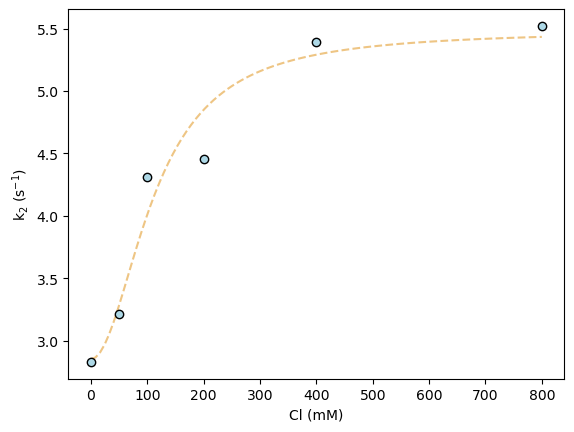

In [8]:
CL=[0,50,100,200,400,800]
K2=[]
E0=100e-3
S0=200
for i,Cl in enumerate(CL):
    D=DataCl[Cl].dropna()
    rD=realH(D)
    c=getc(rD,S0)
    k2=getk2(rD,c,E0)
    Dmax=(-D).max()
    K2.append(k2)
#PLOT
fig=plt.figure()
ax=plt.gca()
ax.plot(CL,K2,'o',markerfacecolor='lightblue', markeredgecolor='k')
#FIT
def hill(x,a,b,c):
    #return a+b*np.log(x-c)#
    return a*(x/b)**2/(1+(x/b)**2)+c
popt, pcov = curve_fit(hill,CL,K2, p0=[1,-1,-100])
#COMPUTE R SQUARE
R2=getR2(K2,hill(np.array(CL),*popt))
print('The fitted equation is '+str(round(popt[2],2))+'+'+str(round(popt[0],2))+'(x/'+str(round(popt[1],2))+')^2/(1+(x/'+str(round(popt[1],2))+')^2))')
print('R^2 is '+str(round(R2,5)))
clp=np.linspace(0,800,100)
yp=hill(clp,*popt)
ax.plot(clp,yp,'--', color=lcolor, zorder=1)
ax.set_xlabel('Cl (mM)')
ax.set_ylabel('k$_2$ (s$^{-1}$)');
fig.savefig('figures/suppfig_k2_vs_chloride.pdf', bbox_inches='tight')

#WRITE DATA
DF=pd.DataFrame({'Cl (mM)': CL, 'k2 (1/s)': K2})
DF.to_excel('results/k2_vs_chloride.xlsx', engine='openpyxl', index=False)

## Finding out $k'_3$ and $k'_{-3}$ (Fig. S19)

When all of the enzyme is in $C$ state, the first two terms in the equation for $dC/dt$ are approximately zero, and so we can limit the dynamics to

$ \displaystyle dC/dt = -k'_3\text{Cl}^-C + k'_{-3} C_2,$

$ \displaystyle dC_2/dt = k'_3\text{Cl}^-C - k'_{-3} C_2.$

This is a linear system of two ODEs. Taking initial conditions $C(0)=E_T, C_2(0)=0$, the solution is

$\displaystyle C(t)=E_T \frac{k'_{-3}}{k'_3\text{Cl}^-+k'_{-3}} + E_T \frac{k'_3}{k'_3\text{Cl}^-+k'_{-3}} e^{-(k'_3\text{Cl}^-+k'_{-3})t}.$

Now, since $dH/dt=-ck'_2 C$, in order to find $k'_3$ and $k'_{-3}$ we just need to fit the previous equation to our heat data, between the maximum and the stationary value.

[In the literature](https://pubs.acs.org/doi/full/10.1021/jacs.2c09876), the terms $v_0$ and $v_s$ are used for the rates of the product creation when there is no inhibition and when the stationary phase has been reached. The correspondence with our derivations is $v_0= k'_2 E_T$ and $\displaystyle v_s= k'_2 E_T \frac{k'_{-3}}{k'_3\text{Cl}^-+k'_{-3}}$.

50 0.00019119960971351847 0.009559980485675924 0.013743986429962895
0.009533425106591616 0.013669923339655703 641
100 0.00011234752106369561 0.011234752106369561 0.006867729887793773
0.011235147668346934 0.00686830389743304 709
200 5.6893271400726626e-05 0.011378654280145326 0.0036396134658450807
0.011425942045230494 0.0036876268539015114 977
400 2.7264838660322e-05 0.0109059354641288 0.0017211321934146706
0.010967680339718032 0.0017677384498282671 1370
800 1.256557482234669e-05 0.010052459857877352 0.001098862190290883
0.01011529521087502 0.0011421381617063952 1720
[9.97687334]
0.9867315085192755
0.6896075130140928
The fitted equation is 0.69/Cl
R^2 is 0.9991


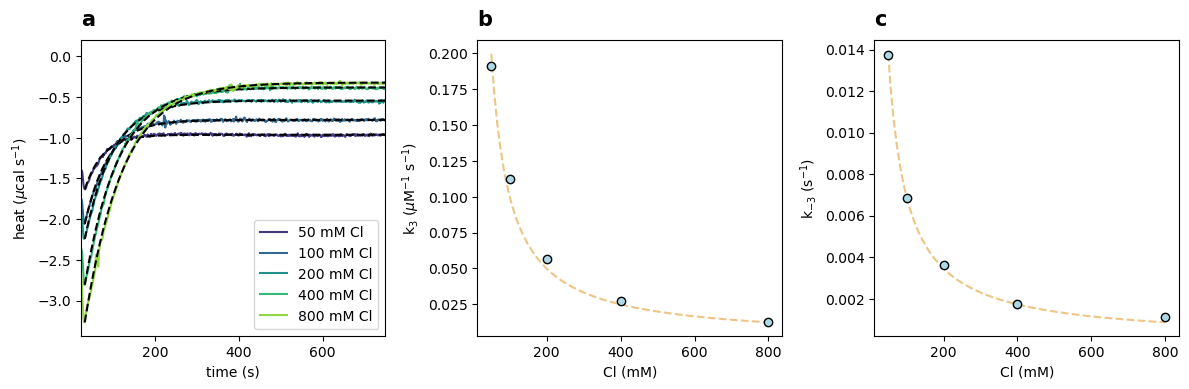

In [12]:
def cvst(t, k3, k_3):
    kobs=k3+k_3
    return k_3/kobs+k3/kobs*np.exp(-kobs*t)

fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(1,3,1)
CL=[0,50,100,200,400,800]
E0=100e-3
S0=200
K3=[]
K_3=[]
for i,Cl in enumerate(CL):
    if Cl==0:
        continue
    D=DataCl[Cl].dropna()
    rD=realH(D)
    xinit=33
    xend=750
    xp=np.array(range(xinit,xend))
    D1=-rD[xinit:xend]    
    popt, pcov = curve_fit(cvst,xp-xinit,D1, p0=[0.01, 0.001])
    c=getc(rD,S0)
    k2=getk2(rD,c,E0)
    D1/=c
    D1/=k2
    D1/=E0
    popt, pcov = curve_fit(cvst,xp-xinit,D1, p0=[0.01, 0.001])
    yp=-c*k2*E0*cvst(xp-xinit,*popt)
    K3.append(popt[0]/Cl)
    K_3.append(popt[1])
    print(Cl,K3[-1],popt[0], popt[1])
    k3,k_3=getk3k4(rD,Cl,E0,S0,int(0.5*len(rD)))
    ax.plot(rD,color=cmap(i/len(CL)), label=str(Cl)+' mM Cl')
    ax.plot(xp,yp,'--k')#, lw=1, color=cmap(i/len(CL)))
ax.set_xlim([xinit-10,xend]);
ax.set_xlabel('time (s)')
ax.set_ylabel('heat ($\mu$cal s$^{-1}$)')
ax.text(0.0,1.05,'a', fontweight='bold', transform=ax.transAxes, fontsize=15)
ax.legend()

#FIND K3
K3=1000*np.array(K3)#since Cl is in mM we have to multiply k3 by 1,000 in order to write it in uM-1 s-1
def inverse(x,a):
    return a/(x)
popt, pcov=curve_fit(inverse,CL[1::],K3)
R2=getR2(K3,inverse(np.array(CL[1::]),*popt))
print(popt)
print(R2)
#PLOT
ax=fig.add_subplot(1,3,2)
clp=np.linspace(50,800,100)
yp=inverse(clp,*popt)
ax.plot(clp,yp,'--', color=lcolor)
ax.plot(CL[1::],K3,'o', markerfacecolor='lightblue', markeredgecolor='k')
ax.set_xlabel('Cl (mM)')
ax.set_ylabel('k$_3$ ($\mu$M$^{-1}$ s$^{-1}$)');
ax.text(0.0,1.05,'b', fontweight='bold', transform=ax.transAxes, fontsize=15)

#WRITE DATA
DF=pd.DataFrame({'Cl (mM)': CL[1::], 'k3 (1/s)': K3})
DF.to_excel('results/k3_vs_chloride.xlsx', engine='openpyxl', index=False)

#FIND K-3
def inverse(x,a):
    return a/(x)
popt, pcov=curve_fit(inverse,CL[1::],K_3)
print(*popt)
#COMPUTE R SQUARE
R2=getR2(K_3,inverse(np.array(CL[1::]),*popt))
print('The fitted equation is '+str(round(popt[0],3))+'/Cl')
print('R^2 is '+str(round(R2,5)))
#PLOT
ax=fig.add_subplot(1,3,3)
ax.set_xlabel('Cl (mM)')
ax.set_ylabel('k$_{-3}$ (s$^{-1}$)')
clp=np.linspace(50,800,100)
yp=inverse(clp,*popt)
ax.plot(clp,yp,'--', color=lcolor)
ax.plot(CL[1::],K_3,'o', markerfacecolor='lightblue', markeredgecolor='k')
ax.text(0.0,1.05,'c', fontweight='bold', transform=ax.transAxes, fontsize=15)
fig.tight_layout()
fig.savefig('figures/suppfig_k3_k_3_vs_chloride.pdf', bbox_inches='tight')

#WRITE DATA
DF=pd.DataFrame({'Cl (mM)': CL[1::], 'k_{-3} (1/s)': K_3})
DF.to_excel('results/k_3_vs_chloride.xlsx', engine='openpyxl', index=False)

# SIMULATED ANNEALING

Our simulated annealing algorithm tries to find a combination of six parameters that
can fit the data simultaneously: $c, k_0, k_1', k_2', k_3', k_{-3}'$. The fact that our algorithm yields similar values for each of these parameters in every iteration (of fifty, see Fig. 4c-f) suggests that we are not
overfitting the model.

From these fits, we corroborate our previous findings regarding the relationship between our apparent rates and chloride. For $k_1'$, as we had no easy way to obtain information from our equations, we had no previous insight. With the help of our numerical algorithm, we find that it has an inverse relationship with chloride.

258.0575196178179 -184.2212917133763
R^2 is 0.93695
5.001183429927745 120.75567334969152 2.895634645092184
R^2 is 0.96402
10.137537870307389
R^2 is 0.87447
0.5739616855835776
R^2 is 0.96262


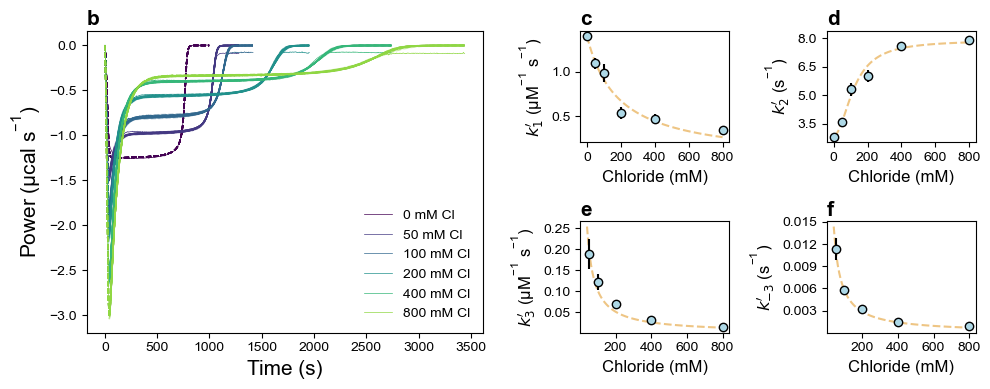

In [12]:
CL=[0,50,100,200,400,800]
DF=pd.DataFrame()
K1avg=[]
K2avg=[]
K3avg=[]
K4avg=[]
K1err=[]
K2err=[]
K3err=[]
K4err=[]
Nmax=50
for i,Cl in enumerate(CL):
    DF1=pd.DataFrame()
    for s in ['51', '52', '53']:#we fitted several parameter sets using our simulated annealing algorithm
        try:
            DFnew=pd.read_csv('results/cppSA_parameters_'+str(Cl)+'_'+s+'.csv')
            DF1=pd.concat([DF1,DFnew])
        except:
            x=0
    DF1.sort_values(by=['Error'],inplace=True)
    DF1.reset_index(drop=True,inplace=True)   
    DF1=DF1.iloc[0:Nmax,:]
    DF1.to_csv('results/cppSA_parameters_'+str(Cl)+'_best.csv')
    K1avg.append(DF1['k1'].mean())
    K1err.append(DF1['k1'].std())
    K2avg.append(DF1['k2'].mean())
    K2err.append(DF1['k2'].std())
    if Cl>0:
        rk3=DF1['k3']/DF1['Cl']*1000
        K3avg.append(rk3.mean())
        K3err.append(rk3.std())
        K4avg.append(DF1['k4'].mean())
        K4err.append(DF1['k4'].std()) 
    else:
        K3avg.append(0)
        K3err.append(0)
        K4avg.append(0)
        K4err.append(0)
    DF=pd.concat([DF,DF1])
DF.reset_index(drop=True,inplace=True)
DF.to_csv('results/cppSA_parameters_best.csv')

Par=pd.DataFrame({'Cl': CL, 'k1avg': K1avg, 'k1err': K1err,
                 'k2avg': K2avg, 'k2err': K2err,
                 'k3avg': K3avg, 'k3err': K3err,
                 'k4avg': K4avg, 'k4err': K4err,})
Par.to_csv('results/chloride_fit_SA.csv', index=False, float_format='%.5f')

matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Arial"
import matplotlib.gridspec as gridspec

#PLOT PARAMETERS
lcolor='#EEC584'
#GRIDSPEC
fig=plt.figure(figsize=(10,4))#,constrained_layout=True)
gs=fig.add_gridspec(2,4)
ax=fig.add_subplot(gs[:,0:2])
cmap=matplotlib.colormaps['viridis']
for i,Cl in enumerate(CL):
    D=DataCl[Cl].dropna()
    rD=realH(D)
    CD=np.cumsum(rD)
    ax.plot(D,color=cmap(i/len(CL)), label=str(Cl)+' mM Cl', lw=0.5)
    #PLOT SIMULATIONS
    for s in range(0,Nmax):#['21']:#['01', '02', '11', '12', '13', '14', '15']:
        try:
            HB=pd.read_csv('results/cppSA_curve_'+str(Cl)+'_best_'+str(s)+'.csv')
            H=HB['Real']
            Hs=HB['Measured']
            CH=np.cumsum(H)
            ax.plot(Hs, ls='--',lw=1, alpha=0.3, color=cmap(i/len(CL)))
        except:
            x=0
ax.set_xlabel('Time (s)', fontsize=15);
ax.set_ylabel('Power $\mathregular{(\mu cal\; s^{-1})}$', fontsize=15);
ax.legend(frameon=False);
ax.text(0.0, 1.02, 'b', fontsize=15, fontweight='bold', transform=ax.transAxes)

#PARAMETERS
ax=fig.add_subplot(gs[0,2])
#ax.plot(DF.Cl, DF.k1, 'o', markeredgecolor='k', color='w', alpha=0.1)
ax.set_xlabel('Chloride (mM)', fontsize=12)
ax.set_xticks([0,200,400,600,800])
ax.set_yticks([0, 0.5, 1, 1.5, 2])
ax.set_ylabel('$\mathregular{\it{k}_{1}\'}$ $\mathregular{(\mu M^{-1}}$ $\mathregular{s^{-1}})$', fontsize=12)
ax.text(0.0, 1.05, 'c', fontsize=15, fontweight='bold', transform=ax.transAxes)
#FIT
def inverse(x,a,b):
    return a/(x-b)
def inverse2(x,a):
    return a/x
def hill(x,a,b,c):
    return a*(x/b)**2/(1+(x/b)**2)+c
popt, pcov = curve_fit(inverse,DF.Cl,DF.k1, p0=[100,-100])
#COMPUTE R SQUARE
R2=getR2(DF.k1,inverse(DF.Cl,*popt))
print(*popt)
print('R^2 is '+str(round(R2,5)))
clp=np.linspace(0,800,100)
yp=inverse(clp,*popt)
ax.plot(clp,yp,'--', color=lcolor)
ax.errorbar(CL, K1avg, yerr=K1err, marker='o', markerfacecolor='lightblue', markeredgecolor='k', linestyle='none', ecolor='k')

ax=fig.add_subplot(gs[0,3])
#ax.plot(DF.Cl, DF.k2, 'o', markeredgecolor='k', color='w', alpha=0.1)
ax.set_xlabel('Chloride (mM)', fontsize=12)
ax.set_xticks([0,200,400,600,800])
ax.set_yticks([2, 3.5, 5, 6.5, 8])
ax.set_ylabel('$\mathregular{\it{k}_{2}\'}$ $\mathregular{(s^{-1}})$', fontsize=12)
ax.text(0.0, 1.05, 'd', fontsize=15, fontweight='bold', transform=ax.transAxes)
popt, pcov = curve_fit(hill,DF.Cl,DF.k2, p0=[5,100,3])
#COMPUTE R SQUARE
R2=getR2(DF.k2,hill(DF.Cl,*popt))
print(*popt)
print('R^2 is '+str(round(R2,5)))
clp=np.linspace(0,800,100)
yp=hill(clp,*popt)
ax.plot(clp,yp,'--', color=lcolor)
ax.errorbar(CL, K2avg, yerr=K2err, marker='o', markerfacecolor='lightblue', markeredgecolor='k', linestyle='none', ecolor='k')

ax=fig.add_subplot(gs[1,2])
DF2=DF[DF.Cl>0]
K3n=1000*np.array(DF2.k3)/np.array(DF2.Cl)
#ax.plot(DF2.Cl, K3n, 'o', markeredgecolor='k', color='w', alpha=0.1)
ax.set_xlabel('Chloride (mM)', fontsize=12)
ax.set_xticks([0,200,400,600,800])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20, 0.25])
ax.set_ylabel('$\mathregular{\it{k}_{3}\'}$ $\mathregular{(\mu M^{-1}}$ $\mathregular{s^{-1})}$', fontsize=12)
ax.text(0.0, 1.05, 'e', fontsize=15, fontweight='bold', transform=ax.transAxes)
popt, pcov = curve_fit(inverse2,DF2.Cl,K3n, p0=[10])
#COMPUTE R SQUARE
R2=getR2(K3n,inverse2(DF2.Cl,*popt))
print(*popt)
print('R^2 is '+str(round(R2,5)))
clp=np.linspace(40,800,100)
yp=inverse2(clp,*popt)
ax.plot(clp,yp,'--', color=lcolor)
ax.errorbar(CL[1::], K3avg[1::], yerr=K3err[1::], marker='o', markerfacecolor='lightblue', markeredgecolor='k', linestyle='none', ecolor='k')

ax=fig.add_subplot(gs[1,3])
#ax.plot(DF2.Cl, DF2.k4, 'o', markeredgecolor='k', color='w', alpha=0.1);
ax.set_xlabel('Chloride (mM)', fontsize=12)
ax.set_xticks([0,200,400,600,800])
ax.set_yticks([0, 0.003, 0.006, 0.009, 0.012, 0.015])
ax.set_ylabel('$\mathregular{\it{k}_{-3}\'}$ $\mathregular{(s^{-1}})$', fontsize=12)
ax.text(0.0, 1.05, 'f', fontsize=15, fontweight='bold', transform=ax.transAxes)
popt, pcov = curve_fit(inverse2,DF2.Cl,DF2.k4, p0=[10])
#COMPUTE R SQUARE
R2=getR2(DF2.k4,inverse2(DF2.Cl,*popt))
print(*popt)
print('R^2 is '+str(round(R2,5)))
clp=np.linspace(40,800,100)
yp=inverse2(clp,*popt)
ax.plot(clp,yp,'--', color=lcolor)
ax.errorbar(CL[1::], K4avg[1::], yerr=K4err[1::], marker='o', markerfacecolor='lightblue', 
            markeredgecolor='k', linestyle='none', ecolor='k')
fig.tight_layout()
fig.savefig('figures/fig4_bottom.pdf', bbox_inches='tight')

The goodness of the fits can be better visualized for each chloride condition separately.

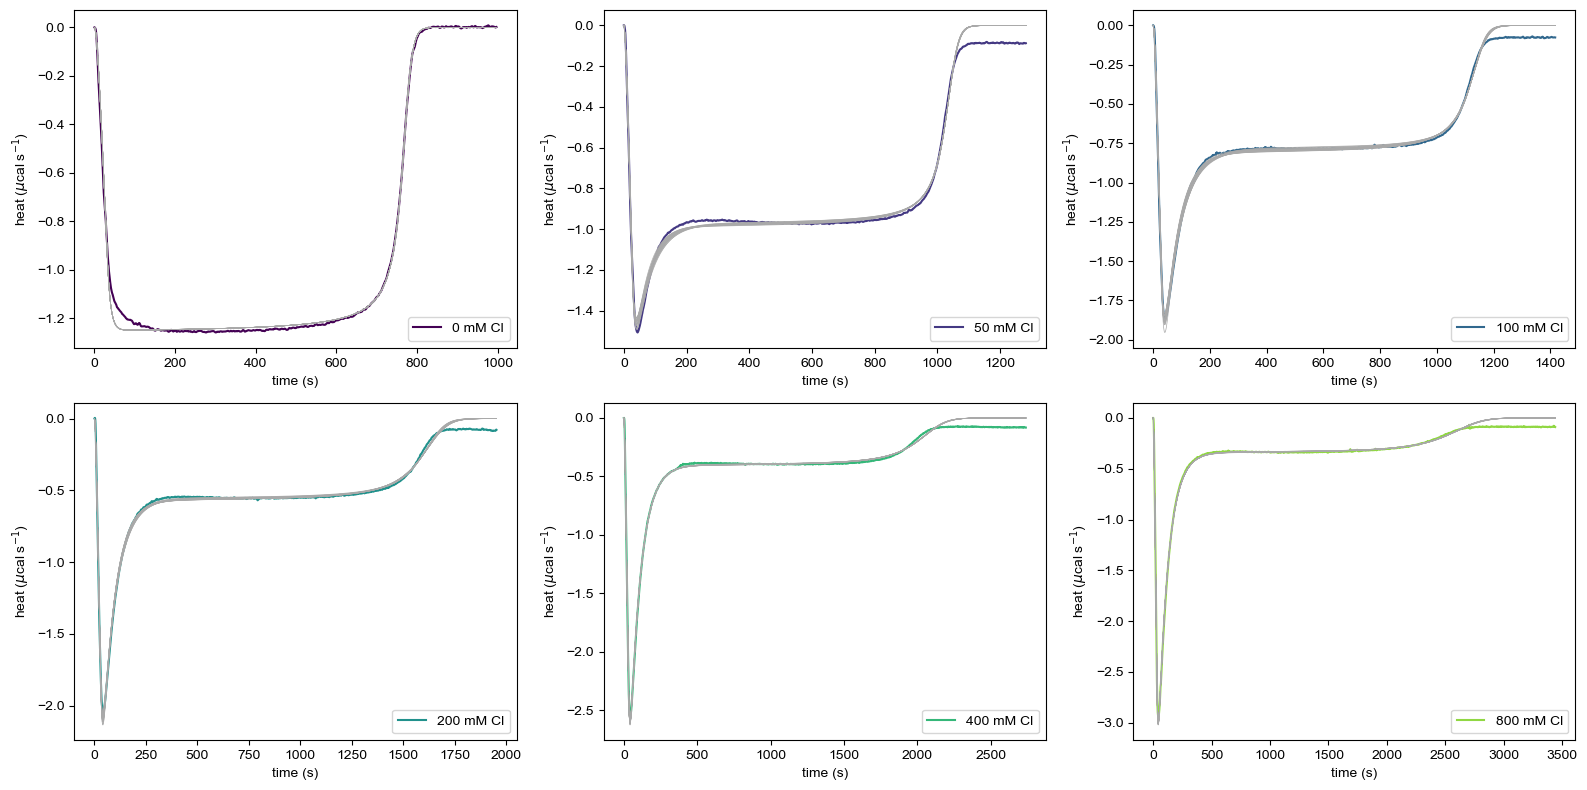

In [13]:
DataCl=Data['Cl']
fig=plt.figure(figsize=(16,8))
cmap=matplotlib.colormaps['viridis']
CL=[0,50,100,200,400,800]
for i,Cl in enumerate(CL):
    ax=fig.add_subplot(2,3,i+1)
    D=DataCl[Cl].dropna()
    rD=realH(D)
    CD=np.cumsum(rD)
    ax.plot(D,color=cmap(i/len(CL)), label=str(Cl)+' mM Cl')
    #PLOT SIMULATIONS
    for s in range(0,20):#['21']:#['01', '02', '11', '12', '13', '14', '15']:
        try:
            HB=pd.read_csv('results/cppSA_curve_'+str(Cl)+'_best_'+str(s)+'.csv')
            H=HB['Real']
            Hs=HB['Measured']
            CH=np.cumsum(H)
            ax.plot(Hs, lw=0.5, color='darkgrey')#, alpha=0.1)#color=cmap(i/len(CL)), alpha=0.1)
        except:
            x=0
    ax.set_xlabel('time (s)');
    ax.set_ylabel('heat ($\mu$cal s$^{-1}$)');
    ax.legend();
fig.tight_layout()
fig.savefig('figures/suppfig_SA_fits_measured.pdf', bbox_inches='tight')

# Simulating a non-zero hydrolysis rate from the inactive intermediate (Fig. S21)

We asked whether the inactive intermediate is also able to hydrolyse imipenem. This new model
would include a new reaction $C_2 \xrightarrow{k_5} E+ P+H$ with a rate $k_5$. The model then becomes

$\displaystyle\frac{dE}{dt}=-k'_1ES+k'_2C+k_5C_2,$

$\displaystyle\frac{dS}{dt}=-k'_1ES,$

$\displaystyle\frac{dC}{dt}=k'_1ES-k'_2C-k'_3\text{Cl}^{-}C+k'_{-3}C_2,$

$\displaystyle\frac{dC_2}{dt}=k'_3\text{Cl}^-C-(k'_{-3}+k_5)C_2,$

$\displaystyle\frac{dH}{dt}=-c(k'_2C+k_5C_2),$

We then simulated this model for different values of k5 and the values of the other parameters. We
see that this new model fails to capture the ITC data even for very low values of k5 from 0 to 0.5 s-1,
which suggests that there is no hydrolysis from the inactive intermediate.

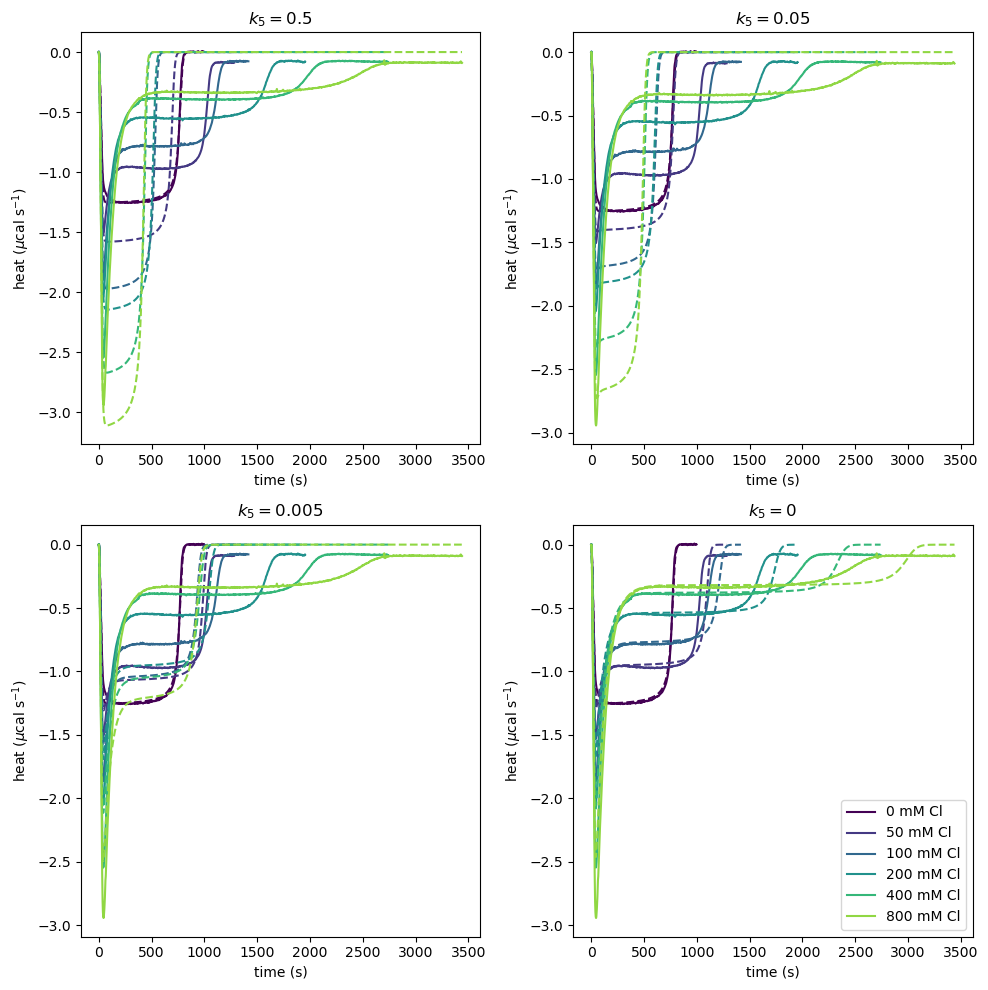

In [3]:
E0=100e-3
S0=200
CL=[0,50,100,200,400,800]

k0=30
k1=1.05
cmap=matplotlib.colormaps['viridis']
fig=plt.figure(figsize=(10,10))
K5=[0.5,0.05,0.005,0]
for j,k5 in enumerate(K5):
    ax=fig.add_subplot(2,2,j+1)
    for i,Cl in enumerate(CL):
        D=DataCl[Cl].dropna()
        rD=realH(D)
        c=getc(rD,S0)
        k2=getk2(rD,c,E0)
        k3,k4=getk3k4(rD,Cl,E0,S0,int(0.5*len(rD)))
        if Cl==0:
            k3=0
            k4=0
        ParamV=[k0,k1,k2,k3,k4,k5]
        Params=Parametersk5(*ParamV,Cl,E0)
        tf=len(D)
        y0=[0,S0,0,0]
        sol=solve_ivp(oxak5,(0,tf),y0,method='RK45',t_eval=range(tf),max_step=1,args=((Params,)))
        T=sol.t
        E=sol.y[0,:]
        S=sol.y[1,:]
        C=sol.y[2,:]
        C2=sol.y[3,:]
        H=heatk5(c,Params.k2,C,Params.k5,C2)
        Hs=measuredH(T,H)
        ax.plot(T,Hs,ls='dashed',color=cmap(i/len(CL)))
        ax.plot(D,color=cmap(i/len(CL)), label=str(CL[i])+' mM Cl')   
    ax.set_title('$k_5=$'+str(k5))
    ax.set_xlabel('time (s)');
    ax.set_ylabel('heat ($\mu$cal s$^{-1}$)');
ax.legend()
fig.tight_layout()
fig.savefig('figures/suppfig_inactive_hydrolisis.pdf', bbox_inches='tight')

# INTERFACE MUTANT

With the data in Fig. S10c, d, we use our mathematical analysis to study the apparent reaction rates
and their relationship to chloride concentration in the interface mutant OXA-48E185A/R186A/R206A as
well (Fig. S22). Simulation plots from fifty parameter sets per chloride condition obtained with our
numerical algorithm (dashed lines) agree quite well with the data (solid lines). 

2136.353546173296 -6383.277309212076
R^2 is 0.09706
0.6381627003086104 -0.003019950126160742 4.480803999999966
R^2 is 0.67648
12.902667058823528
R^2 is 0.90319
1.3068801317647059
R^2 is 0.88129


/home/pcatalan/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


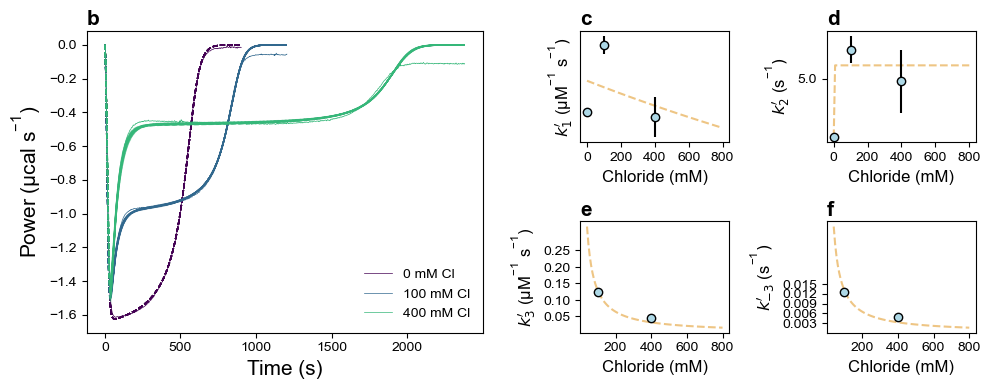

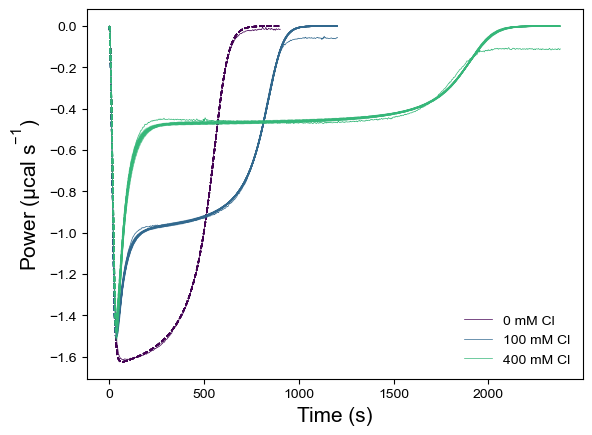

In [14]:
CL=[0,100,400]
DataCl=pd.read_excel('data/dataCl_interface_mutant.xlsx')
DataCl=DataCl[DataCl.time>=60].reset_index(drop=True)

DF=pd.DataFrame()
K1avg=[]
K2avg=[]
K3avg=[]
K4avg=[]
K1err=[]
K2err=[]
K3err=[]
K4err=[]
Nmax=50
for i,Cl in enumerate(CL):
    DF1=pd.DataFrame()
    for s in ['01', '02']:#01', '02', '03', '04', '11', '12', '21', '22', '31', '32']:
        try:
            DFnew=pd.read_csv('results/cppSA_parameters_'+str(Cl)+'_'+s+'_interface_mutant.csv')
            DF1=pd.concat([DF1,DFnew])
        except:
            x=0
    DF1.sort_values(by=['Error'],inplace=True)
    DF1.reset_index(drop=True,inplace=True)   
    DF1=DF1.iloc[0:Nmax,:]
    DF1.to_csv('results/cppSA_parameters_'+str(Cl)+'_best_interface_mutant.csv')
    K1avg.append(DF1['k1'].mean())
    K1err.append(DF1['k1'].std())
    K2avg.append(DF1['k2'].mean())
    K2err.append(DF1['k2'].std())
    if Cl>0:
        rk3=DF1['k3']/DF1['Cl']*1000
        K3avg.append(rk3.mean())
        K3err.append(rk3.std())
        K4avg.append(DF1['k4'].mean())
        K4err.append(DF1['k4'].std()) 
    else:
        K3avg.append(0)
        K3err.append(0)
        K4avg.append(0)
        K4err.append(0)
    DF=pd.concat([DF,DF1])
DF.reset_index(drop=True,inplace=True)
DF.to_csv('results/cppSA_parameters_best_interface_mutant.csv')

Par=pd.DataFrame({'Cl': CL, 'k1avg': K1avg, 'k1err': K1err,
                 'k2avg': K2avg, 'k2err': K2err,
                 'k3avg': K3avg, 'k3err': K3err,
                 'k4avg': K4avg, 'k4err': K4err,})
Par.to_csv('results/chloride_fit_SA_interface_mutant.csv', index=False, float_format='%.5f')

matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Arial"
import matplotlib.gridspec as gridspec

#PLOT PARAMETERS
lcolor='#EEC584'
#GRIDSPEC
fig=plt.figure(figsize=(10,4))#,constrained_layout=True)
gs=fig.add_gridspec(2,4)
ax=fig.add_subplot(gs[:,0:2])
fig2=plt.figure()
ax2=plt.gca()
cmap=matplotlib.colormaps['viridis']
for i,Cl in enumerate(CL):
    D=DataCl[Cl].dropna()
    rD=realH(D)
    CD=np.cumsum(rD)
    ax.plot(D,color=cmap(i/len(CL)), label=str(Cl)+' mM Cl', lw=0.5)
    ax2.plot(D,color=cmap(i/len(CL)), label=str(Cl)+' mM Cl', lw=0.5)
    #PLOT SIMULATIONS
    for s in range(0,Nmax):#['21']:#['01', '02', '11', '12', '13', '14', '15']:
        try:
            HB=pd.read_csv('results/cppSA_curve_'+str(Cl)+'_best_'+str(s)+'_interface_mutant.csv')
            H=HB['Real']
            Hs=HB['Measured']
            CH=np.cumsum(H)
            ax.plot(Hs, ls='--',lw=1, alpha=0.3, color=cmap(i/len(CL)))
            ax2.plot(Hs, ls='--',lw=1, alpha=0.3, color=cmap(i/len(CL)))
        except:
            x=0
ax.set_xlabel('Time (s)', fontsize=15);
ax.set_ylabel('Power $\mathregular{(\mu cal\; s^{-1})}$', fontsize=15);
ax.legend(frameon=False);
ax.text(0.0, 1.02, 'b', fontsize=15, fontweight='bold', transform=ax.transAxes)
ax2.set_xlabel('Time (s)', fontsize=15);
ax2.set_ylabel('Power $\mathregular{(\mu cal\; s^{-1})}$', fontsize=15);
ax2.legend(frameon=False);
fig2.savefig('figures/suppfig_interface_mutant_fit.pdf', bbox_inches='tight')


#PARAMETERS
ax=fig.add_subplot(gs[0,2])
#ax.plot(DF.Cl, DF.k1, 'o', markeredgecolor='k', color='w', alpha=0.1)
ax.set_xlabel('Chloride (mM)', fontsize=12)
ax.set_xticks([0,200,400,600,800])
ax.set_yticks([0, 0.5, 1, 1.5, 2])
ax.set_ylabel('$\mathregular{\it{k}_{1}\'}$ $\mathregular{(\mu M^{-1}}$ $\mathregular{s^{-1}})$', fontsize=12)
ax.text(0.0, 1.05, 'c', fontsize=15, fontweight='bold', transform=ax.transAxes)
#FIT
def inverse(x,a,b):
    return a/(x-b)
def inverse2(x,a):
    return a/x
def hill(x,a,b,c):
    return a*(x/b)**2/(1+(x/b)**2)+c
popt, pcov = curve_fit(inverse,DF.Cl,DF.k1, p0=[100,-100])
#COMPUTE R SQUARE
R2=getR2(DF.k1,inverse(DF.Cl,*popt))
print(*popt)
print('R^2 is '+str(round(R2,5)))
clp=np.linspace(0,800,100)
yp=inverse(clp,*popt)
ax.plot(clp,yp,'--', color=lcolor)
ax.errorbar(CL, K1avg, yerr=K1err, marker='o', markerfacecolor='lightblue', markeredgecolor='k', linestyle='none', ecolor='k')

ax=fig.add_subplot(gs[0,3])
#ax.plot(DF.Cl, DF.k2, 'o', markeredgecolor='k', color='w', alpha=0.1)
ax.set_xlabel('Chloride (mM)', fontsize=12)
ax.set_xticks([0,200,400,600,800])
ax.set_yticks([2, 3.5, 5, 6.5, 8])
ax.set_ylabel('$\mathregular{\it{k}_{2}\'}$ $\mathregular{(s^{-1}})$', fontsize=12)
ax.text(0.0, 1.05, 'd', fontsize=15, fontweight='bold', transform=ax.transAxes)
popt, pcov = curve_fit(hill,DF.Cl,DF.k2, p0=[5,100,3])
#COMPUTE R SQUARE
R2=getR2(DF.k2,hill(DF.Cl,*popt))
print(*popt)
print('R^2 is '+str(round(R2,5)))
clp=np.linspace(0,800,100)
yp=hill(clp,*popt)
ax.plot(clp,yp,'--', color=lcolor)
ax.errorbar(CL, K2avg, yerr=K2err, marker='o', markerfacecolor='lightblue', markeredgecolor='k', linestyle='none', ecolor='k')

ax=fig.add_subplot(gs[1,2])
DF2=DF[DF.Cl>0]
K3n=1000*np.array(DF2.k3)/np.array(DF2.Cl)
#ax.plot(DF2.Cl, K3n, 'o', markeredgecolor='k', color='w', alpha=0.1)
ax.set_xlabel('Chloride (mM)', fontsize=12)
ax.set_xticks([0,200,400,600,800])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20, 0.25])
ax.set_ylabel('$\mathregular{\it{k}_{3}\'}$ $\mathregular{(\mu M^{-1}}$ $\mathregular{s^{-1})}$', fontsize=12)
ax.text(0.0, 1.05, 'e', fontsize=15, fontweight='bold', transform=ax.transAxes)
popt, pcov = curve_fit(inverse2,DF2.Cl,K3n, p0=[10])
#COMPUTE R SQUARE
R2=getR2(K3n,inverse2(DF2.Cl,*popt))
print(*popt)
print('R^2 is '+str(round(R2,5)))
clp=np.linspace(40,800,100)
yp=inverse2(clp,*popt)
ax.plot(clp,yp,'--', color=lcolor)
ax.errorbar(CL[1::], K3avg[1::], yerr=K3err[1::], marker='o', markerfacecolor='lightblue', markeredgecolor='k', linestyle='none', ecolor='k')

ax=fig.add_subplot(gs[1,3])
#ax.plot(DF2.Cl, DF2.k4, 'o', markeredgecolor='k', color='w', alpha=0.1);
ax.set_xlabel('Chloride (mM)', fontsize=12)
ax.set_xticks([0,200,400,600,800])
ax.set_yticks([0, 0.003, 0.006, 0.009, 0.012, 0.015])
ax.set_ylabel('$\mathregular{\it{k}_{-3}\'}$ $\mathregular{(s^{-1}})$', fontsize=12)
ax.text(0.0, 1.05, 'f', fontsize=15, fontweight='bold', transform=ax.transAxes)
popt, pcov = curve_fit(inverse2,DF2.Cl,DF2.k4, p0=[10])
#COMPUTE R SQUARE
R2=getR2(DF2.k4,inverse2(DF2.Cl,*popt))
print(*popt)
print('R^2 is '+str(round(R2,5)))
clp=np.linspace(40,800,100)
yp=inverse2(clp,*popt)
ax.plot(clp,yp,'--', color=lcolor)
ax.errorbar(CL[1::], K4avg[1::], yerr=K4err[1::], marker='o', markerfacecolor='lightblue', 
            markeredgecolor='k', linestyle='none', ecolor='k')

#ax.plot(CL[1::], K4[1::], 's')
fig.tight_layout()
#fig.savefig('figures/suppfig_interface_mutant_fit.pdf', bbox_inches='tight')
#fig.savefig('figures/fig4_bottom.png', bbox_inches='tight')

# Simulating all experiments

With the information we have gathered about the apparent rates, we can now simulate the model to fit the different ITC datasets we have. We will use the approximated parameters we have obtained using simplified arguments, and not the ones obtained through numerical optimization (because we would have to repeat the algorithm for every curve). We will see that these approximated parameter sets work quite well.

## Different chloride concentrations

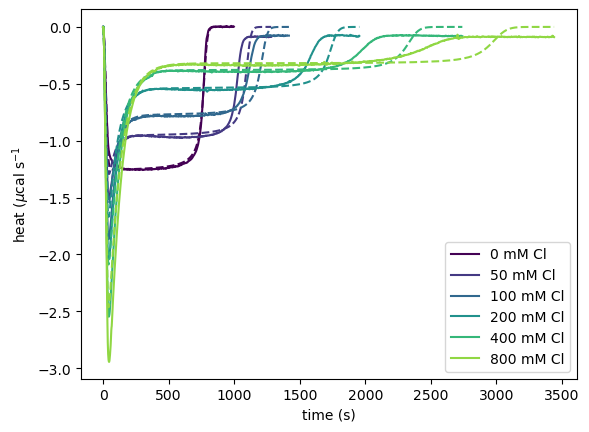

In [8]:
#SIMULATE CL DATA
E0=100e-3
S0=200
CL=[0,50,100,200,400,800]
k0=30
k1=1.05
fig=plt.figure()
ax=plt.gca()
cmap=matplotlib.colormaps['viridis']
DFmap={}
DFmap['Time']=np.array(range(len(DataCl[800].dropna())))+60
for i,Cl in enumerate(CL):
    D=DataCl[Cl].dropna()
    rD=realH(D)
    c=getc(D,S0)
    k2=getk2(rD,c,E0)
    k3,k4=getk3k4(rD,Cl,E0,S0,int(0.5*len(rD)))
    if Cl==0:
        k3=0
        k4=0
    Params=Parameters(k0,k1,k2,k3,k4,E0)
    tf=len(D)
    y0=[0,S0,0,0]
    sol=solve_ivp(oxa,(0,tf),y0,method='RK45',t_eval=range(tf),max_step=1,args=((Params,)))
    T=sol.t
    C=sol.y[2,:]
    H=heat(c,Params.k2,C)
    Hs=measuredH(T,H)
    ax.plot(T,Hs,ls='dashed',color=cmap(i/len(CL)))
    ax.plot(D,color=cmap(i/len(CL)), label=str(CL[i])+' mM Cl')
    DFmap[Cl]=Hs
ax.legend()
ax.set_xlabel('time (s)')
ax.set_ylabel('heat ($\mu$cal s$^{-1}$')
fig.savefig('figures/suppfig_dataCl_fit.pdf', bbox_inches='tight')

#WRITE DATA
DF=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in DFmap.items() ]))
DF.to_excel('results/dataCl.xls', engine='openpyxl', index=False)

## Different substrate concentrations

Here the chloride concentration has been fixed to 100 mM, and so we will use the parameters we found out before for this concentration.

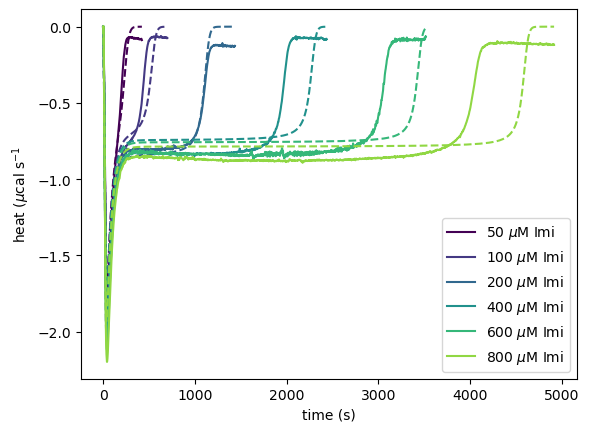

In [17]:
#SIMULATE S DATA
DataS=Data['S']
E0=100e-3
Cl=100
ST=[50,100,200,400,600,800]
c=4.78
k0=25
k1=1.05
k3=0.01
k4=0.006

k0=25
k1=1.02
k3=0.013
k4=0.0057
fig=plt.figure()
ax=plt.gca()
cmap=matplotlib.colormaps['viridis']
DFmap={}
DFmap['Time']=np.array(range(len(DataS[800].dropna())))+60
for i,S0 in enumerate(ST):
    D=DataS[S0].dropna()
    rD=realH(D)
    c=getc(D,S0)
    k2=getk2(rD,c,E0)
    k2=5.68
    Params=Parameters(k0,k1,k2,k3,k4,E0)
    tf=len(D)
    y0=[0,S0,0,0]
    sol=solve_ivp(oxa,(0,tf),y0,method='RK45',t_eval=range(tf),max_step=1,args=((Params,)))
    T=sol.t
    C=sol.y[2,:]
    H=heat(c,Params.k2,C)
    Hs=measuredH(T,H)
    ax.plot(T,Hs,ls='dashed',color=cmap(i/len(ST)))
    ax.plot(D,color=cmap(i/len(ST)), label=str(ST[i])+' $\mu$M Imi')
    DFmap[S0]=Hs
ax.legend()
ax.set_xlabel('time (s)')
ax.set_ylabel('heat ($\mu$cal s$^{-1}$')
#ax.set_xlim([0,200])
fig.savefig('figures/suppfig_dataS_refs.pdf', bbox_inches='tight')

#WRITE DATA
DF=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in DFmap.items() ]))
DF.to_excel('results/dataS_refs.xlsx', engine='openpyxl', index=False)

## Different enzyme concentrations

We have two different datasets for this. In this case we need to recalculate $k_3$ as the quality of the enzyme was not as good as in the other datasets.

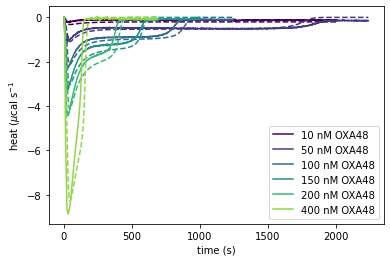

In [9]:
#SIMULATE E DATA
DataE=Data['E']
S0=200
Cl=100
ET=[10,50,100,150,200,400]
c=4.78
k0=25
k1=1.05
#k3=0.01
k4=0.006
delay=37
fig=plt.figure()
ax=plt.gca()
cmap=matplotlib.cm.get_cmap('viridis')
DFmap={}
DFmap['Time']=np.array(range(len(DataE[10].dropna())))+60
for i,E0 in enumerate(ET):
    D=DataE[E0].dropna()
    E0/=1000#we simulate the model in micro molar
    rD=realH(D)
    k2=getk2(rD,c,E0)
    k3,k4=getk3k4(rD,Cl,E0,S0)
    Params=Parameters(k0,k1,k2,k3,k4,delay,E0)
    tf=len(D)
    y0=[0,S0,0,0]
    sol=solve_ivp(oxa,(0,tf),y0,method='RK45',t_eval=range(tf),max_step=0.1,args=((Params,)))
    T=sol.t
    C=sol.y[2,:]
    H=heat(c,Params.k2,C)
    Hs=measuredH(T,H)
    ax.plot(T,Hs,ls='dashed',color=cmap(i/len(ET)))
    ax.plot(rD,color=cmap(i/len(ET)), label=str(ET[i])+' nM OXA48')
    DFmap[E0]=Hs
ax.legend()
ax.set_xlabel('time (s)')
ax.set_ylabel('heat ($\mu$cal s$^{-1}$')
fig.savefig('figures/suppfig_dataE.pdf', bbox_inches='tight')

#WRITE DATA
DF=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in DFmap.items() ]))
DF.to_excel('results/dataE.xls', engine='openpyxl', index=False)

# DIFFERENT E CONCENTRATIONS (2)

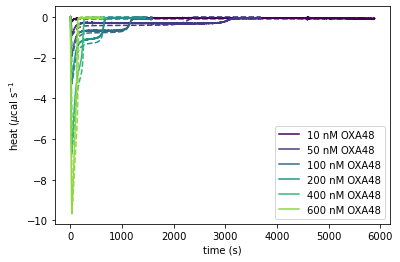

In [10]:
#SIMULATE E DATA (2)
DataE2=Data['E2']
S0=200
Cl=100
ET=[10,50,100,200,400,600]
c=4.78
k0=25
k1=1.05
#k3=0.01
k4=0.006
delay=37
fig=plt.figure()
ax=plt.gca()
cmap=matplotlib.cm.get_cmap('viridis')
DFmap={}
DFmap['Time']=np.array(range(len(DataE2[10].dropna())))+60
for i,E0 in enumerate(ET):
    D=DataE2[E0].dropna()
    E0/=1000#we simulate the model in micro molar
    rD=realH(D)
    k2=getk2(rD,c,E0)
    k3=getk3(rD,Cl)
    Params=Parameters(k0,k1,k2,k3,k4,delay,E0)
    tf=len(D)
    y0=[0,S0,0,0]
    sol=solve_ivp(oxa,(0,tf),y0,method='RK45',t_eval=range(tf),max_step=0.1,args=((Params,)))
    T=sol.t
    C=sol.y[2,:]
    H=heat(c,Params.k2,C)
    Hs=measuredH(T,H)
    ax.plot(T,Hs,ls='dashed',color=cmap(i/len(ET)))
    ax.plot(rD,color=cmap(i/len(ET)), label=str(ET[i])+' nM OXA48')
    DFmap[E0]=Hs
ax.legend()
ax.set_xlabel('time (s)')
ax.set_ylabel('heat ($\mu$cal s$^{-1}$')
fig.savefig('figures/suppfig_dataE2.pdf', bbox_inches='tight')

#WRITE DATA
DF=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in DFmap.items() ]))
DF.to_excel('results/dataE2.xls', engine='openpyxl', index=False)

# REACTIVATION EXPERIMENTS

In these experiments, new substrate will be injected to the ITC chamber at different points, in order to test our model that there is an inactive enzyme form $C_2$.

## REACTIVATION AT 100 mM Cl

Here, when we calculate $c$, we need to account for the fact that the enzyme will hydrolyze two times the initial substrate ($S_0=180 \mu M$ in this case). Aside from that, we can use the rest of the parameters as before.

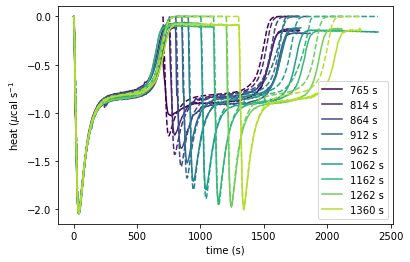

In [31]:
DataR100=Data['R100']
thr=60
E0=100e-3
S0=180
TR=[765, 814, 864, 912, 962, 1062, 1162, 1262, 1360]
Cl=100
k0=23
k1=1.05
c=3.6#this is the value of c that best fits the data
k3=0.0095
k4=0.0059  
delay=37
fig=plt.figure()
ax=plt.gca()
cmap=matplotlib.cm.get_cmap('viridis')
for i,tf in enumerate(TR):
    D=DataR100[tf].dropna()
    ax.plot(D,color=cmap(i/len(TR)), label=str(tf)+' s')
    rD=realH(D)
    tf=tf-thr
    k2=getk2(rD[0:tf],c,E0)
    delay=37
    Params=Parameters(k0,k1,k2,k3,k4,delay,E0)
    y0=[0,S0,0,0]
    sol=solve_ivp(oxa,(0,tf),y0,method='Radau',t_eval=range(tf),args=((Params,)))
    T=sol.t
    E=sol.y[0,:]
    C=sol.y[2,:]
    C2=sol.y[3,:]
    H=heat(c,Params.k2,C)
    Hs=measuredH(T,H)
    ax.plot(T,Hs,ls='dashed',color=cmap(i/len(TR)))
    #REACTIVATION
    delay=37
    Params=Parameters(k0,k1,k2,k3,k4,delay,E[-1])
    y0=[0,S0,C[-1],C2[-1]]
    #sol=solve_ivp(oxa,(0,len(D)-tf),y0,method='RK45',t_eval=(range(len(D)-tf)),max_step=0.1,args=((Params,)))
    sol=solve_ivp(oxa,(0,len(D)-tf),y0,method='Radau',t_eval=(range(len(D)-tf)),args=((Params,)))
    T=sol.t
    C=sol.y[2,:]
    H=heat(c,Params.k2,C)
    Hs2=measuredH(T,H)
    ax.plot(T+tf,Hs2,ls='dashed',color=cmap(i/len(TR)))
ax.legend()
ax.set_xlabel('time (s)')
ax.set_ylabel('heat ($\mu$cal s$^{-1}$')
fig.savefig('figures/suppfig_dataR100_normal_delay.pdf', bbox_inches='tight')

Interestingly, the peak of released heat after reinjection is overestimated for the early injection times. This is because we have assumed that the delay in the reaction $C \rightarrow C_2$ gets restarted after reinjection. If we set the delay to zero after reinjection, we get the following:

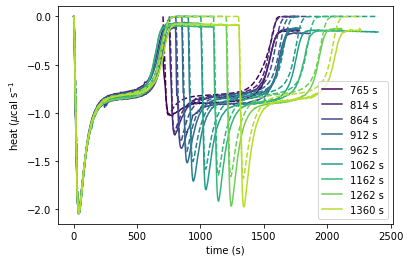

In [32]:
DataR100=Data['R100']
thr=60
E0=100e-3
S0=180
TR=[765, 814, 864, 912, 962, 1062, 1162, 1262, 1360]
Cl=100
k0=23
k1=1.05
c=3.6#this is the value of c that best fits the data
k3=0.0095
k4=0.0059  
delay=37
fig=plt.figure()
ax=plt.gca()
cmap=matplotlib.cm.get_cmap('viridis')
for i,tf in enumerate(TR):
    D=DataR100[tf].dropna()
    ax.plot(D,color=cmap(i/len(TR)), label=str(tf)+' s')
    rD=realH(D)
    tf=tf-thr
    k2=getk2(rD[0:tf],c,E0)
    delay=37
    Params=Parameters(k0,k1,k2,k3,k4,delay,E0)
    y0=[0,S0,0,0]
    sol=solve_ivp(oxa,(0,tf),y0,method='Radau',t_eval=range(tf),args=((Params,)))
    T=sol.t
    E=sol.y[0,:]
    C=sol.y[2,:]
    C2=sol.y[3,:]
    H=heat(c,Params.k2,C)
    Hs=measuredH(T,H)
    ax.plot(T,Hs,ls='dashed',color=cmap(i/len(TR)))
    #REACTIVATION
    delay=0
    Params=Parameters(k0,k1,k2,k3,k4,delay,E[-1])
    y0=[0,S0,C[-1],C2[-1]]
    #sol=solve_ivp(oxa,(0,len(D)-tf),y0,method='RK45',t_eval=(range(len(D)-tf)),max_step=0.1,args=((Params,)))
    sol=solve_ivp(oxa,(0,len(D)-tf),y0,method='Radau',t_eval=(range(len(D)-tf)),args=((Params,)))
    T=sol.t
    C=sol.y[2,:]
    H=heat(c,Params.k2,C)
    Hs2=measuredH(T,H)
    ax.plot(T+tf,Hs2,ls='dashed',color=cmap(i/len(TR)))
ax.legend()
ax.set_xlabel('time (s)')
ax.set_ylabel('heat ($\mu$cal s$^{-1}$')
fig.savefig('figures/suppfig_dataR100_no_delay.pdf', bbox_inches='tight')

So here the heat release peaks after reinjection are underestimated especially for the late reinjection times. This suggests that there is a mechanistic explanation behind the delay, whereby the "active" enzyme does not have any delay and starts getting transformed into $C_2$ immediately, but after some time without interacting with the substrate it requires some time before that reaction can take place. We will discuss later a possible chemical mechanism for this, but before that we will show that an *ad hoc* Hill function mimicking a delay that starts at zero and slowly grows up to 37 seconds captures the peaks much better than the previous figures.

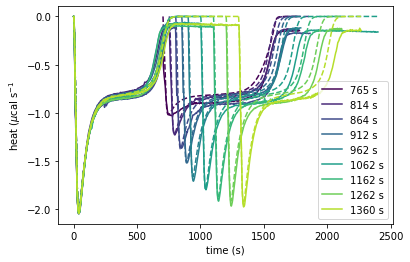

In [33]:
DataR100=Data['R100']
thr=60
E0=100e-3
S0=180
TR=[765, 814, 864, 912, 962, 1062, 1162, 1262, 1360]
Cl=100
k0=23
k1=1.05
c=3.6#this is the value of c that best fits the data
k3=0.0095
k4=0.0059  
delay=37
fig=plt.figure()
ax=plt.gca()
cmap=matplotlib.cm.get_cmap('viridis')
for i,tf in enumerate(TR):
    D=DataR100[tf].dropna()
    ax.plot(D,color=cmap(i/len(TR)), label=str(tf)+' s')
    rD=realH(D)
    tf=tf-thr
    k2=getk2(rD[0:tf],c,E0)
    delay=37
    Params=Parameters(k0,k1,k2,k3,k4,delay,E0)
    y0=[0,S0,0,0]
    sol=solve_ivp(oxa,(0,tf),y0,method='Radau',t_eval=range(tf),args=((Params,)))
    T=sol.t
    E=sol.y[0,:]
    C=sol.y[2,:]
    C2=sol.y[3,:]
    H=heat(c,Params.k2,C)
    Hs=measuredH(T,H)
    ax.plot(T,Hs,ls='dashed',color=cmap(i/len(TR)))
    #REACTIVATION
    delay=37*(tf-705)/(tf-600)
    Params=Parameters(k0,k1,k2,k3,k4,delay,E[-1])
    y0=[0,S0,C[-1],C2[-1]]
    #sol=solve_ivp(oxa,(0,len(D)-tf),y0,method='RK45',t_eval=(range(len(D)-tf)),max_step=0.1,args=((Params,)))
    sol=solve_ivp(oxa,(0,len(D)-tf),y0,method='Radau',t_eval=(range(len(D)-tf)),args=((Params,)))
    T=sol.t
    C=sol.y[2,:]
    H=heat(c,Params.k2,C)
    Hs2=measuredH(T,H)
    ax.plot(T+tf,Hs2,ls='dashed',color=cmap(i/len(TR)))
ax.legend()
ax.set_xlabel('time (s)')
ax.set_ylabel('heat ($\mu$cal s$^{-1}$')
fig.savefig('figures/suppfig_dataR100_progressive_delay.pdf', bbox_inches='tight')

## REACTIVATION AT 400mM CL 

This is very similar to the previous case:

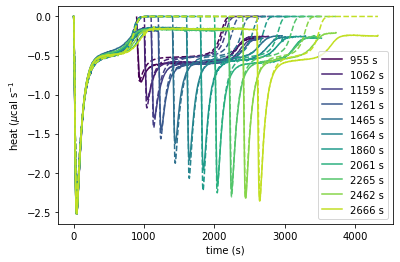

In [44]:
DataR400=Data['R400']
thr=60
E0=100e-3
S0=140
TR=[955, 1062, 1159, 1261, 1465, 1664, 1860, 2061, 2265, 2462, 2666]
Cl=400
k0=25
k1=1.05
c=4.5
k2=6.02
k3=0.01
k4=0.0025
delay=37
fig=plt.figure()
ax=plt.gca()
cmap=matplotlib.cm.get_cmap('viridis')
for i,tf in enumerate(TR):
    D=DataR400[tf].dropna()
    ax.plot(D,color=cmap(i/len(TR)), label=str(tf)+' s')
    rD=realH(D)
    tf=tf-thr
    k2=getk2(rD[0:tf],c,E0)
    delay=37
    Params=Parameters(k0,k1,k2,k3,k4,delay,E0)
    y0=[0,S0,0,0]
    sol=solve_ivp(oxa,(0,tf),y0,method='Radau',t_eval=range(tf),args=((Params,)))
    T=sol.t
    E=sol.y[0,:]
    C=sol.y[2,:]
    C2=sol.y[3,:]
    H=heat(c,Params.k2,C)
    Hs=measuredH(T,H)
    ax.plot(T,Hs,ls='dashed',color=cmap(i/len(TR)))
    #REACTIVATION
    delay=37*(tf-900)/(tf-700)
    Params=Parameters(k0,k1,k2,k3,k4,delay,E[-1])
    y0=[0,S0,C[-1],C2[-1]]
    #sol=solve_ivp(oxa,(0,len(D)-tf),y0,method='RK45',t_eval=(range(len(D)-tf)),max_step=0.1,args=((Params,)))
    sol=solve_ivp(oxa,(0,len(D)-tf),y0,method='Radau',t_eval=(range(len(D)-tf)),args=((Params,)))
    T=sol.t
    C=sol.y[2,:]
    H=heat(c,Params.k2,C)
    Hs2=measuredH(T,H)
    ax.plot(T+tf,Hs2,ls='dashed',color=cmap(i/len(TR)))
ax.legend()
ax.set_xlabel('time (s)')
ax.set_ylabel('heat ($\mu$cal s$^{-1}$')
fig.savefig('figures/suppfig_dataR400.pdf', bbox_inches='tight')